In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = '/kaggle/input/modbus-traffic-data/modbus_traffic_data.csv'
df = pd.read_csv(file_path)

# Fill missing values with -1
df.fillna(-1, inplace=True)

def hex_to_dec(x):
    x_str = str(x).strip()
    try:
        # If it's hexadecimal
        if all(c in '0123456789abcdefABCDEF' for c in x_str):
            return int(x_str, 16)
        else:
            # Convert to float and then int if it's not hexadecimal
            return int(float(x_str))
    except ValueError:
        # Return -1 if it's an invalid value
        return -1

# Select feature columns (all columns except 'label')
feature_cols = [col for col in df.columns if col != 'label']

# Apply hex_to_dec to all feature columns
for col in feature_cols:
    df[col] = df[col].apply(hex_to_dec)


# Split the data into features and target
X = df.drop('label', axis=1).values
y = df['label'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print data shapes to verify
print(f"Train set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
assert X_train.shape[0] + X_test.shape[0] == df.shape[0], "Train and test splits don't add up!"


Train set shape: (5352, 17)
Test set shape: (1338, 17)


In [7]:
import matplotlib.pyplot as plt

def plot_history(hist, title="Training History"):
    acc = hist.history.get("accuracy") or hist.history.get("acc")
    val_acc = hist.history.get("val_accuracy") or hist.history.get("val_acc")
    loss = hist.history.get("loss")
    val_loss = hist.history.get("val_loss")

    if acc is not None:
        plt.figure()
        plt.plot(acc, label="train")
        if val_acc is not None:
            plt.plot(val_acc, label="val")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.title(f"{title} — Accuracy")
        plt.legend()
        plt.grid(True)
        plt.show()

    if loss is not None:
        plt.figure()
        plt.plot(loss, label="train")
        if val_loss is not None:
            plt.plot(val_loss, label="val")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title(f"{title} — Loss")
        plt.legend()
        plt.grid(True)
        plt.show()


**No-Attention**

In [8]:
from tensorflow.keras.layers import Input, Conv1D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import layers

input_layer = Input(shape=(19, 1))

conv1 = Conv1D(32, kernel_size=3, activation='relu', strides=1, padding='same')(input_layer)
conv1 = layers.BatchNormalization()(conv1)

conv2 = Conv1D(64, kernel_size=3, activation='relu', strides=1, padding='same')(conv1)
conv2 = layers.BatchNormalization()(conv2)

conv3 = Conv1D(128, kernel_size=3, activation='relu', strides=1, padding='same')(conv2)
conv3 = layers.BatchNormalization()(conv3)

flatten = Flatten()(conv3)
dense_layer1 = Dense(512, activation='relu')(flatten)
dropout_layer1 = Dropout(0.5)(dense_layer1)
dense_layer2 = Dense(256, activation='relu')(dropout_layer1)
dropout_layer2 = Dropout(0.5)(dense_layer2)

output_layer = Dense(1, activation='sigmoid')(dropout_layer2)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


2025-09-18 03:57:24.845207: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758167845.041023      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758167845.097025      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1758167856.668212      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 19, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 19, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 19, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 19, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 19, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 19, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 19, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2432)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,245,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,409,217 (5.38 MB)

 Trainable params: 1,408,769 (5.37 MB)

 Non-trainable params: 448 (1.75 KB)

In [9]:
history_cnn = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


I0000 00:00:1758167873.023423     106 service.cc:148] XLA service 0x7e31a401b0c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758167873.023957     106 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1758167873.510664     106 cuda_dnn.cc:529] Loaded cuDNN version 90300


 53/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9022 - loss: 0.2397

I0000 00:00:1758167876.572884     106 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


134/134 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9467 - loss: 0.1328 - val_accuracy: 0.9244 - val_loss: 0.1818
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9970 - loss: 0.0096 - val_accuracy: 0.9991 - val_loss: 0.0383
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9991 - loss: 0.0058 - val_accuracy: 0.9991 - val_loss: 0.0420
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 8.5155e-06 - val_accuracy: 0.9991 - val_loss: 0.0441
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 3.5234e-04 - val_accuracy: 0.9991 - val_loss: 0.0447
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 2.0880e-05 - val_accuracy: 0.9991 - val_loss: 0.0435
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 1.6108e-07 - val_accuracy: 0.9991 - val_loss: 0.0435
Epoch 8/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 2.0407e-06 - val_a

In [10]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.2f}")

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 6.9010e-12
Test accuracy: 1.00


**With-Attention**

In [13]:
from tensorflow.keras.layers import Input, Conv1D, Dense, Flatten, Dropout, BatchNormalization, Attention
from tensorflow.keras.models import Model
from tensorflow.keras import layers

input_layer = Input(shape=(19, 1))

attn_output = Attention()([input_layer, input_layer])
attn_output = layers.BatchNormalization()(attn_output)

conv1 = Conv1D(32, kernel_size=3, activation='relu', strides=1, padding='same')(attn_output)
conv1 = layers.BatchNormalization()(conv1)

conv2 = Conv1D(64, kernel_size=3, activation='relu', strides=1, padding='same')(conv1)
conv2 = layers.BatchNormalization()(conv2)
conv3 = Conv1D(128, kernel_size=3, activation='relu', strides=1, padding='same')(conv2)
conv3 = layers.BatchNormalization()(conv3)

flatten = Flatten()(conv3)
dense_layer1 = Dense(512, activation='relu')(flatten)
dropout_layer1 = Dropout(0.5)(dense_layer1)
dense_layer2 = Dense(256, activation='relu')(dropout_layer1)
dropout_layer2 = Dropout(0.5)(dense_layer2)

output_layer = Dense(1, activation='sigmoid')(dropout_layer2)

attention_model = Model(inputs=input_layer, outputs=output_layer)
attention_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

attention_model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 19, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_1         │ (None, 19, 1)     │          0 │ input_layer_2[0]… │
│ (Attention)         │                   │            │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 19, 1)     │          4 │ attention_1[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_6 (Conv1D)   │ (None, 19, 32)    │        128 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 19, 32)    │        128 │ conv1d_6[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_7 (Conv1D)   │ (None, 19, 64)    │      6,208 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 19, 64)    │        256 │ conv1d_7[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_8 (Conv1D)   │ (None, 19, 128)   │     24,704 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 19, 128)   │        512 │ conv1d_8[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 2432)      │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 512)       │  1,245,696 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 512)       │          0 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 256)       │    131,328 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 256)       │          0 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 1)         │        257 │ dropout_5[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,409,221 (5.38 MB)

 Trainable params: 1,408,771 (5.37 MB)

 Non-trainable params: 450 (1.76 KB)

In [14]:
history_attn = attention_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.8905 - loss: 0.3794 - val_accuracy: 0.5696 - val_loss: 0.6710
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9792 - loss: 0.0819 - val_accuracy: 0.6555 - val_loss: 0.8020
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9844 - loss: 0.0743 - val_accuracy: 0.8665 - val_loss: 0.2592
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9889 - loss: 0.0425 - val_accuracy: 0.9879 - val_loss: 0.0475
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9902 - loss: 0.0358 - val_accuracy: 0.9888 - val_loss: 0.0551
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9917 - loss: 0.0306 - val_accuracy: 0.9869 - val_loss: 0.0308
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9883 - loss: 0.0355 - val_accuracy: 0.9860 - val_loss: 0.0373
Epoch 8/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9860 - loss: 0.0595 - val_accuracy: 

In [15]:
loss, accuracy = attention_model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.2f}")

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9911 - loss: 0.0248
Test accuracy: 0.99


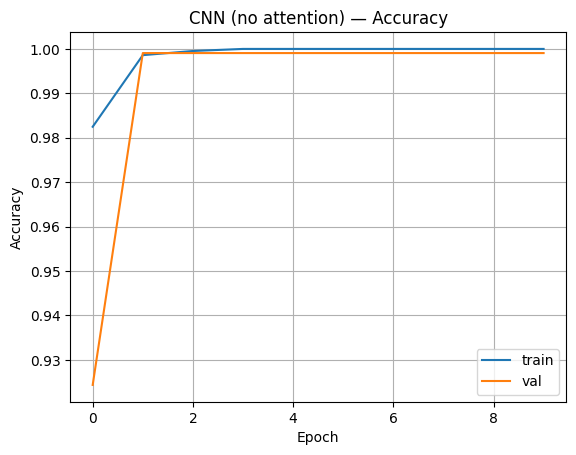

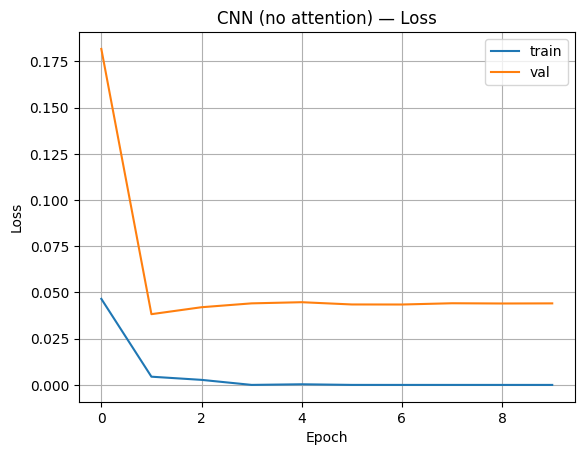

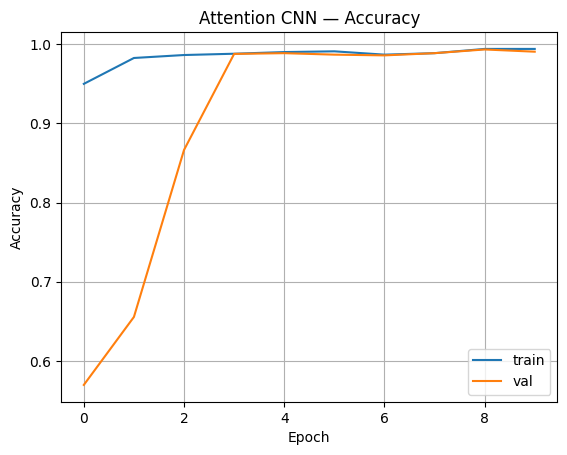

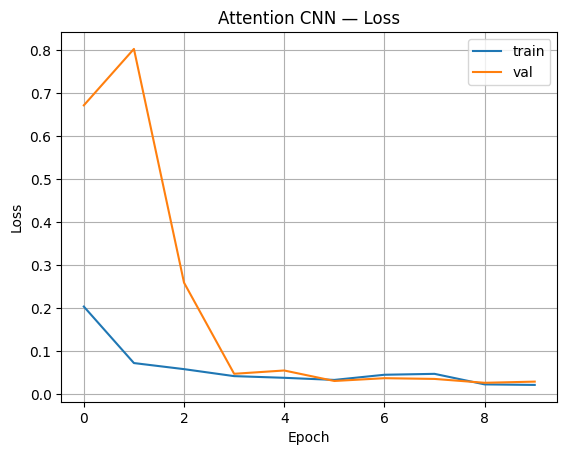

In [16]:
plot_history(history_cnn, title="CNN (no attention)")
plot_history(history_attn, title="Attention CNN")


42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


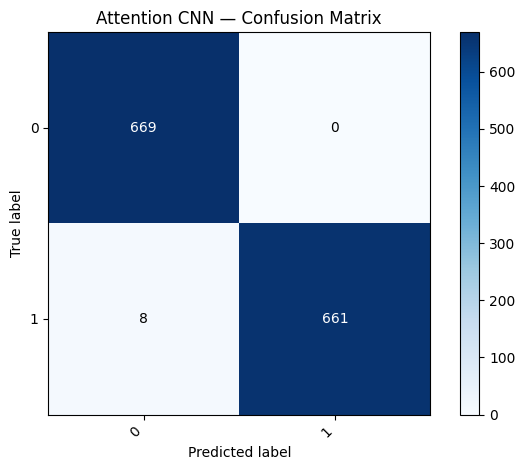

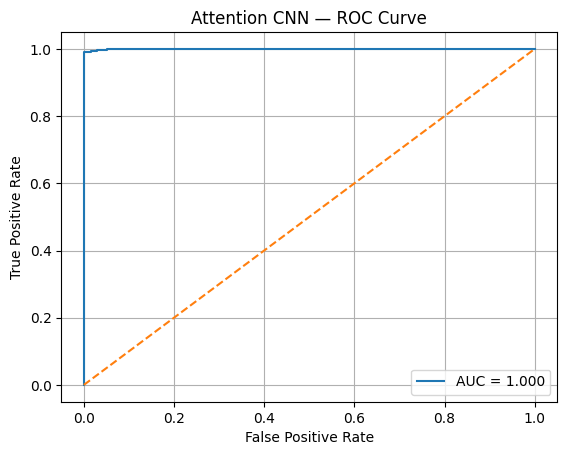

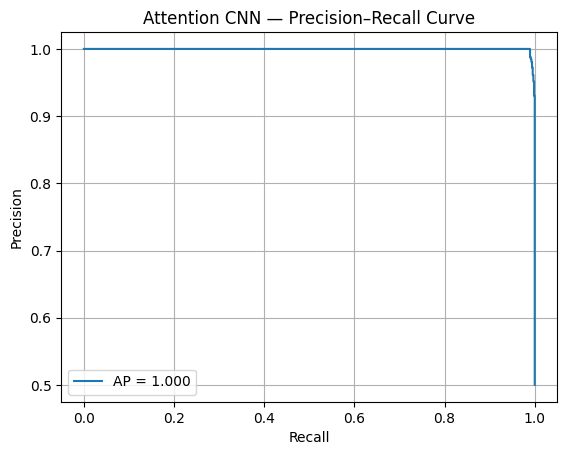

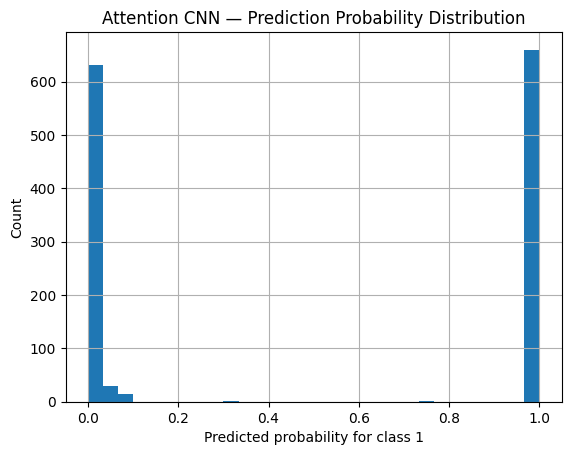

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


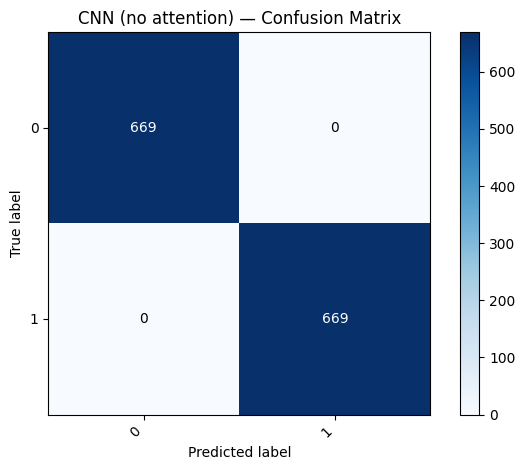

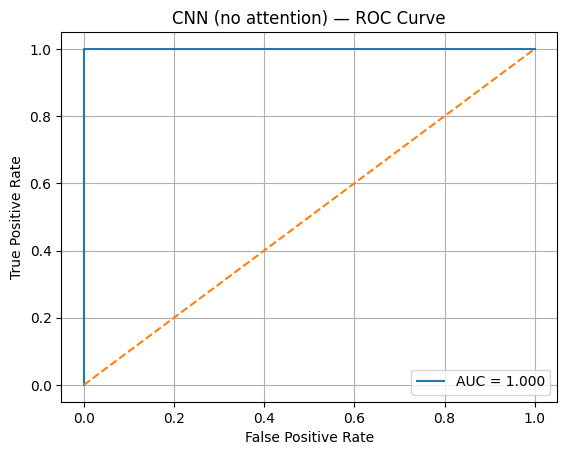

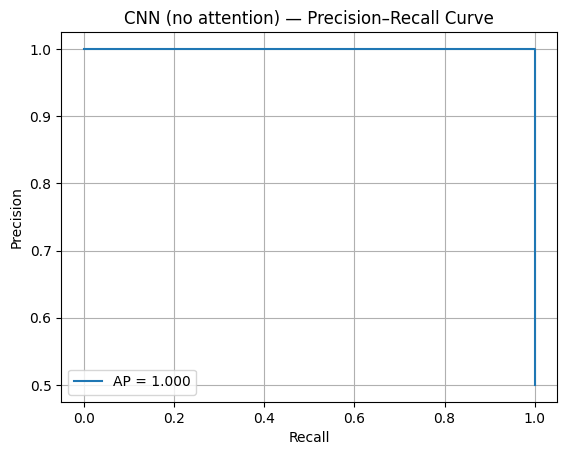

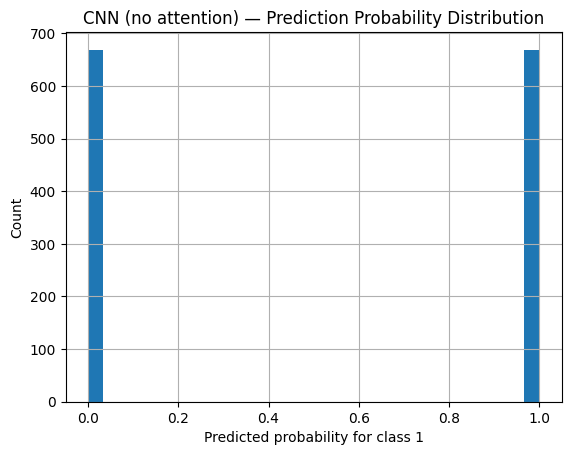

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, roc_curve, auc,
    precision_recall_curve, average_precision_score
)
from sklearn.preprocessing import label_binarize

def _ensure_labels_and_proba(model, X, y_true):
    """
    Returns (y_true_labels, proba, n_classes).
      - y_true can be 1D labels or one-hot; we output 1D labels.
      - proba is (n_samples, n_classes). For binary, shape becomes (n_samples, 2).
    """
    # y_true -> labels
    y_true = np.asarray(y_true)
    if y_true.ndim == 2:
        # one-hot -> labels
        y_labels = y_true.argmax(axis=1)
    else:
        y_labels = y_true

    # predict
    pred = model.predict(X)
    pred = np.asarray(pred)

    # Normalize shapes into (N, C)
    if pred.ndim == 1:
        # (N,) -> assume it's probability of class 1 in binary case
        proba = np.stack([1 - pred, pred], axis=1)
    elif pred.ndim == 2:
        if pred.shape[1] == 1:
            # (N,1) -> binary probability of class 1
            p1 = pred.ravel()
            proba = np.stack([1 - p1, p1], axis=1)
        else:
            # (N,C) -> multiclass softmax probs (assumed)
            proba = pred
    else:
        # Unexpected (e.g., (N,T,1)); flatten last dims and try to take last feature
        proba = pred.reshape(pred.shape[0], -1)
        if proba.shape[1] == 1:
            p1 = proba.ravel()
            proba = np.stack([1 - p1, p1], axis=1)

    n_classes = proba.shape[1]
    return y_labels, proba, n_classes

def _plot_confusion_matrix(cm, class_names=None, title="Confusion Matrix", cmap=plt.cm.Blues):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()  # adds color scale bar on the side

    # tick labels
    if class_names is None:
        class_names = [str(i) for i in range(cm.shape[0])]
    plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=45, ha='right')
    plt.yticks(ticks=np.arange(len(class_names)), labels=class_names)

    # write the numbers inside
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, int(cm[i, j]),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()
    plt.show()


def _plot_binary_curves(y_true, proba, title_prefix=""):
    # proba for class 1
    p1 = proba[:, 1]
    # ROC
    fpr, tpr, _ = roc_curve(y_true, p1)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{title_prefix}ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.show()
    # PR
    precision, recall, _ = precision_recall_curve(y_true, p1)
    ap = average_precision_score(y_true, p1)
    plt.figure()
    plt.plot(recall, precision, label=f"AP = {ap:.3f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"{title_prefix}Precision–Recall Curve")
    plt.legend()
    plt.grid(True)
    plt.show()
    # probability histogram
    plt.figure()
    plt.hist(p1, bins=30)
    plt.xlabel("Predicted probability for class 1")
    plt.ylabel("Count")
    plt.title(f"{title_prefix}Prediction Probability Distribution")
    plt.grid(True)
    plt.show()

def _plot_multiclass_curves(y_true_labels, proba, class_names=None, title_prefix=""):
    """
    One-vs-rest ROC & PR curves with micro-average for multiclass.
    """
    n_classes = proba.shape[1]
    y_bin = label_binarize(y_true_labels, classes=np.arange(n_classes))
    # ROC (micro-average)
    from sklearn.metrics import roc_auc_score
    fpr_list, tpr_list, auc_list = [], [], []
    plt.figure()
    for c in range(n_classes):
        fpr, tpr, _ = roc_curve(y_bin[:, c], proba[:, c])
        roc_auc = auc(fpr, tpr)
        fpr_list.append(fpr); tpr_list.append(tpr); auc_list.append(roc_auc)
        name = class_names[c] if class_names else f"class {c}"
        plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.3f})")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{title_prefix}ROC Curves (One-vs-Rest)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # PR (micro-average)
    plt.figure()
    for c in range(n_classes):
        precision, recall, _ = precision_recall_curve(y_bin[:, c], proba[:, c])
        ap = average_precision_score(y_bin[:, c], proba[:, c])
        name = class_names[c] if class_names else f"class {c}"
        plt.plot(recall, precision, label=f"{name} (AP={ap:.3f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"{title_prefix}Precision–Recall Curves (One-vs-Rest)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # probability histogram (show max-prob across classes)
    max_p = proba.max(axis=1)
    plt.figure()
    plt.hist(max_p, bins=30)
    plt.xlabel("Max predicted class probability")
    plt.ylabel("Count")
    plt.title(f"{title_prefix}Prediction Confidence Distribution")
    plt.grid(True)
    plt.show()

def evaluate_and_plot_for_models(models_dict, X_test, y_test, class_names=None):
    """
    models_dict: { 'Model Name': model_obj, ... }
    Handles binary or multiclass automatically.
    """
    for name, mdl in models_dict.items():
        if mdl is None:
            continue
        y_labels, proba, n_classes = _ensure_labels_and_proba(mdl, X_test, y_test)

        # Confusion Matrix
        y_pred_labels = proba.argmax(axis=1)
        cm = confusion_matrix(y_labels, y_pred_labels)
        _plot_confusion_matrix(cm, class_names, title=f"{name} — Confusion Matrix")

        # ROC / PR
        if n_classes == 2:
            _plot_binary_curves(y_labels, proba, title_prefix=f"{name} — ")
        else:
            _plot_multiclass_curves(y_labels, proba, class_names, title_prefix=f"{name} — ")

# --------- USE IT ----------
available_models = {}
if 'loaded_model' in globals():       available_models['Loaded CNN'] = loaded_model
if 'attention_model' in globals():    available_models['Attention CNN'] = attention_model
if 'model' in globals():              available_models['CNN (no attention)'] = model

# Optional: provide class names if you have them (length must equal #classes)
# class_names = ['Normal', 'UP_Normal']  # for binary example
# class_names = [f'class_{i}' for i in range(K)]  # for multiclass example

evaluate_and_plot_for_models(available_models, X_test, y_test, class_names=globals().get('class_names', None))


**LIME XAI**

In [20]:
!pip install lime

In [22]:
from lime import lime_tabular

import numpy as np

def predict_fn(x):
    preds = model.predict(x).astype(float)
    return np.hstack((1 - preds, preds))


explainer = lime_tabular.LimeTabularExplainer(X_train, 
    feature_names=[f'byte_{i+1}' for i in range(X_train.shape[1])],
    class_names=['class_0_Normal', 'class_1_UP_Normal'],
    mode='classification')


def predict_fn_with_attention(x):
    preds = attention_model.predict(x).astype(float)
    return np.hstack((1 - preds, preds))


explainer_attention = lime_tabular.LimeTabularExplainer(X_train, 
    feature_names=[f'byte_{i+1}' for i in range(X_train.shape[1])],
    class_names=['class_0_Normal', 'class_1_UP_Normal'],
    mode='classification')


**LIME (WITHOUT ATTENTION)**

In [60]:
idx = 95

In [61]:
print('Tested Packet:') 
print(X_test[idx])
print('Actual_Label:')
print(y_test[idx])
print('Predicted_Label:')
print(model.predict(X_test[idx:idx+1]))
print('LIME EXPLANATION:')
exp = explainer.explain_instance(X_test[idx], predict_fn=predict_fn, num_features=19)
exp.show_in_notebook()#(show_table=True, show_all=False)

Tested Packet:
[ 1 48  0  0  0  6  1  2  0  4  0  4 -1 -1 -1 -1 -1 -1 -1]
Actual_Label:
0
Predicted_Label:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[8.1040403e-20]]
LIME EXPLANATION:
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [63]:
#fig = exp.as_pyplot_figure()
#fig.savefig('lime_report.jpg')

#exp.save_to_file('lime_report.html')


**LIME (WITH ATTENTION)**

In [62]:
print('Tested Packet:') 
print(X_test[idx])
print('Actual_Label:')
print(y_test[idx])
print('Predicted_Label:')
print(attention_model.predict(X_test[idx:idx+1]))
print('LIME EXPLANATION --ATTENTION--:')
exp = explainer_attention.explain_instance(X_test[idx], predict_fn=predict_fn_with_attention, num_features=19)
exp.show_in_notebook()#(show_table=True, show_all=False)

Tested Packet:
[ 1 48  0  0  0  6  1  2  0  4  0  4 -1 -1 -1 -1 -1 -1 -1]
Actual_Label:
0
Predicted_Label:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[3.7097794e-11]]
LIME EXPLANATION --ATTENTION--:
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
